In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

**Data Preparation**

In [2]:
training_set = image_dataset_from_directory(
    "D:\\Hoc Tap\\HK6\\DACN1\\Dataset - train+val+test\\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 76515 files belonging to 4 classes.


In [3]:
validation_set = image_dataset_from_directory(
    "D:\\Hoc Tap\\HK6\\DACN1\\Dataset - train+val+test\\val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  # giữ lại nếu bạn dùng TensorFlow >= 2.13
)


Found 21861 files belonging to 4 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
input_shape=(224,224,3)

In [6]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=input_shape,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
   # name="MobileNetV3Large",
)

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.Input(shape=input_shape))

In [9]:
model.add(mobnet)

In [10]:
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [11]:
metrics_list = ["accuracy",tf.keras.metrics.F1Score()]


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=metrics_list
)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [15]:
with tf.device('/GPU:0'):
    training_history = model.fit(x=training_set,validation_data =validation_set,epochs = 15)


Epoch 1/15


2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9222s 4s/step - accuracy: 0.8508 - f1_score: 0.6335 - loss: 1.2335 - val_accuracy: 0.8970 - val_f1_score: 0.6934 - val_loss: 0.9832
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 8991s 4s/step - accuracy: 0.8933 - f1_score: 0.6904 - loss: 0.9233 - val_accuracy: 0.8866 - val_f1_score: 0.6915 - val_loss: 0.7455
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9091s 4s/step - accuracy: 0.8877 - f1_score: 0.6936 - loss: 0.6981 - val_accuracy: 0.8948 - val_f1_score: 0.6894 - val_loss: 0.5818
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9253s 4s/step - accuracy: 0.9316 - f1_score: 0.8597 - loss: 0.5388 - val_accuracy: 0.9613 - val_f1_score: 0.9328 - val_loss: 0.4404
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9308s 4s/step - accuracy: 0.9598 - f1_score: 0.9310 - loss: 0.4179 - val_accuracy: 0.9611 - val_f1_score: 0.9282 - val_loss: 0.3614
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 9225s 4s/step - accuracy: 0.9608 - f1_score: 0.9334 - loss: 0.3347 - val_accuracy: 0.9528 - val_f1_

In [16]:
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")



In [17]:
training_history.history

{'accuracy': [0.8823237419128418,
  0.8940861225128174,
  0.8913546204566956,
  0.9498921632766724,
  0.9626478552818298,
  0.9646605253219604,
  0.9708815217018127,
  0.9759785532951355,
  0.9794942140579224,
  0.9811540246009827,
  0.98485267162323,
  0.9865124225616455,
  0.9889302849769592,
  0.9894530773162842,
  0.9903940558433533],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.88883454, 0.8506572 , 0.        , 0.9580682 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9130302 , 0.9047177 , 0.        , 0.95189244], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.95418125, 0.9190693 , 0.        , 0.9141017 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9565497 , 0.93397677, 0.7740826 , 0.9768153 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96673477, 0.9464979 , 0.8416121 , 0.98409307], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=

In [18]:
# Saving training history using pickle
import pickle
with open("Training_history.pkl", "wb") as f:
    pickle.dump(training_history.history, f)

In [19]:
# Reloading history from pickle file
import pickle
with open("Training_history.pkl", "rb") as f:
    load_history = pickle.load(f)
print(load_history)


{'accuracy': [0.8823237419128418, 0.8940861225128174, 0.8913546204566956, 0.9498921632766724, 0.9626478552818298, 0.9646605253219604, 0.9708815217018127, 0.9759785532951355, 0.9794942140579224, 0.9811540246009827, 0.98485267162323, 0.9865124225616455, 0.9889302849769592, 0.9894530773162842, 0.9903940558433533], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.88883454, 0.8506572 , 0.        , 0.9580682 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9130302 , 0.9047177 , 0.        , 0.95189244], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.95418125, 0.9190693 , 0.        , 0.9141017 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9565497 , 0.93397677, 0.7740826 , 0.9768153 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96673477, 0.9464979 , 0.8416121 , 0.98409307], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96902025, 0.95010173, 0.852567

In [20]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

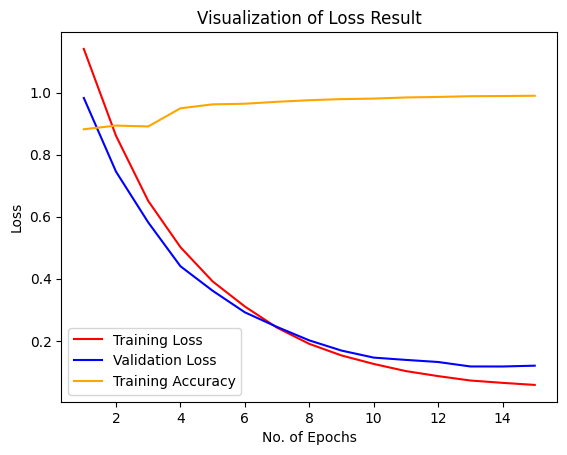

In [21]:
# Loss Visualization
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 16)]
plt.plot(epochs, load_history['loss'], color='red', label='Training Loss')
plt.plot(epochs, load_history['val_loss'], color='blue', label='Validation Loss')
# Accuracy Visualization
plt.plot(epochs, load_history['accuracy'], color='orange', label='Training Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()


In [23]:
# Model Evaluation
model = tf.keras.models.load_model("Trained_Eye_disease_model.h5", compile=False)


ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 3.0 (of type <class 'float'>)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,485,510 (62.89 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 10,974,074 (41.86 MB)

In [25]:
test_set = image_dataset_from_directory(
    "D:\\Hoc Tap\\HK6\\DACN1\\Dataset - train+val+test\\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  # giữ lại nếu bạn dùng TensorFlow >= 2.13
)

Found 10933 files belonging to 4 classes.


In [26]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 240s 702ms/step - accuracy: 0.9656 - f1_score: 0.9390 - loss: 0.1491


In [27]:
print("Test Loss: {:.5f}".format(test_loss))
print("Test Accuracy: {:.2f}".format(test_acc*100))

Test Loss: 0.13352
Test Accuracy: 96.92


In [28]:
test_loss,test_acc,f1_score

(0.13351616263389587,
 0.9691758751869202,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9743725 , 0.95944166, 0.86141455, 0.9857754 ], dtype=float32)>)

In [29]:
#Computing True lable from test_set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [31]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([1, 3, 3, ..., 3, 0, 0], dtype=int64)>

In [32]:
#Computing Predicted lable from test_set
prediction_categories = model.predict(test_set)
prediction_categories 

342/342 ━━━━━━━━━━━━━━━━━━━━ 223s 648ms/step


array([[0.9844765 , 0.00452494, 0.00684231, 0.00415625],
       [0.00291943, 0.00377908, 0.00451377, 0.9887877 ],
       [0.01293166, 0.9674695 , 0.00595043, 0.01364848],
       ...,
       [0.9844765 , 0.00452494, 0.00684231, 0.00415625],
       [0.9835654 , 0.00469404, 0.00738083, 0.00435978],
       [0.9844765 , 0.00452494, 0.00684231, 0.00415625]], dtype=float32)

In [33]:
Y_predict = tf.argmax(prediction_categories, axis=1)
Y_predict

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 3, 1, ..., 0, 0, 0], dtype=int64)>

In [34]:
#1.Classfication Report
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_predict))

              precision    recall  f1-score   support

           0       0.35      0.36      0.35      3746
           1       0.11      0.11      0.11      1161
           2       0.09      0.09      0.09       887
           3       0.47      0.47      0.47      5139

    accuracy                           0.36     10933
   macro avg       0.25      0.25      0.25     10933
weighted avg       0.36      0.36      0.36     10933



2. Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_predict)
cm

array([[1336,  374,  282, 1754],
       [ 392,  125,   93,  551],
       [ 293,   97,   77,  420],
       [1803,  536,  400, 2400]], dtype=int64)

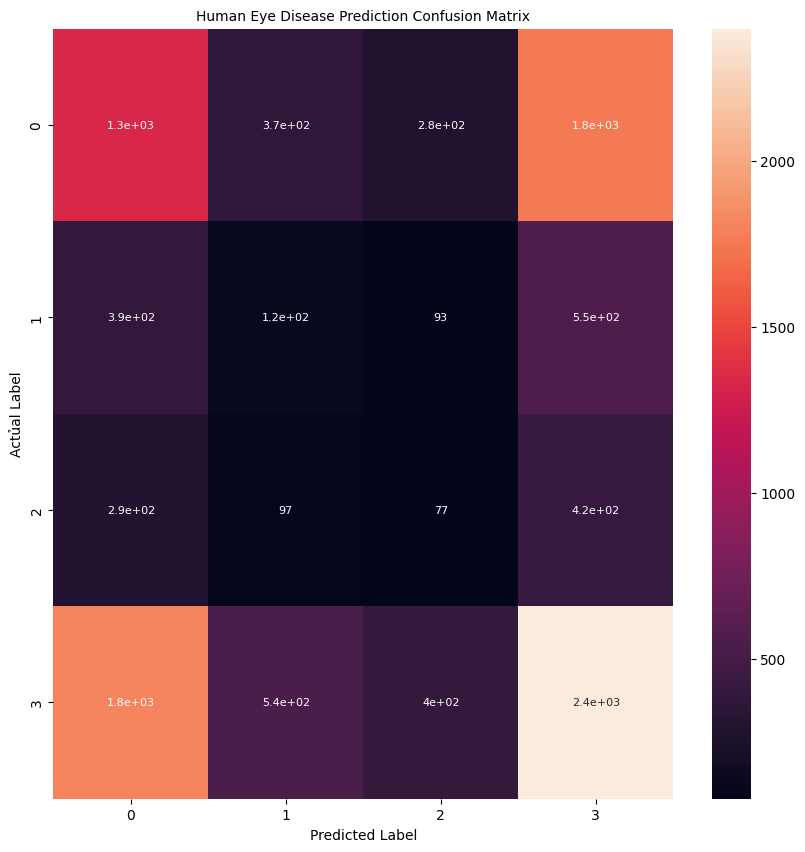

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, annot_kws={"size": 8})
plt.xlabel("Predicted Label", fontsize=10)
plt.ylabel("Actủal Label", fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix", fontsize=10)
plt.show()